In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from sklearn.cluster import KMeans

# Script below binarizes images and demonstrates with a batch of test images. The before and after are displayed sequentially. 
First test performed on 08-21-2019
Last test performed on 08-23-2019

Notes--- Added a bilateral filter to the images which seems to help immensely! <br>
Notes--- Removed simple filter and just using Otsu method based on historgram <br>
Notes--- Failures occur when the expected modes in the histogram does not reflect the observed. I.e., There is overlap in the pixel intensities for lines/graph and writing. How to get around this?

Once the script is done processing, save as .pdf so that it can be compared to previous scripts and attempts at the problem.

## Overview of Binarization Pipeline

Below is an example of the binarization pipeline. It is not optimized for all images but works well for some. 

### Convert to Grayscale
1. Read in image.
2. Convert to grayscale.

### Remove Noise
3. Apply a bilateral filter which is highly effective in noise removal while keeping edges sharp compared to other filters.

### Remove Any Shadows on Image
4. Dilate image to blur out text
5. Blur image with median blur function
6. Subtract this image from the original image that was a result of 3.

### Binarization
7. Apply Otsu Binarization which searches for a threshold based on the local minima in a bimodal histogram.


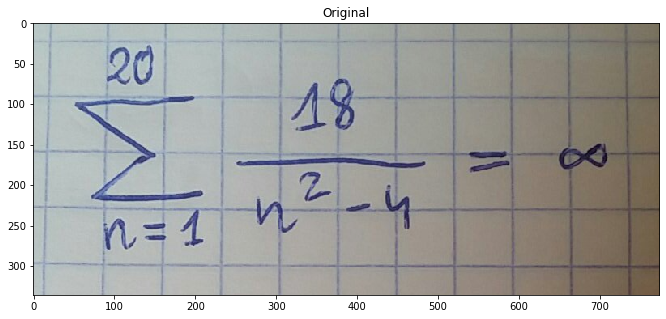

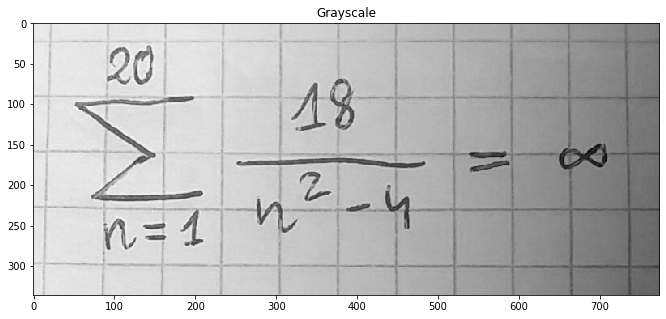

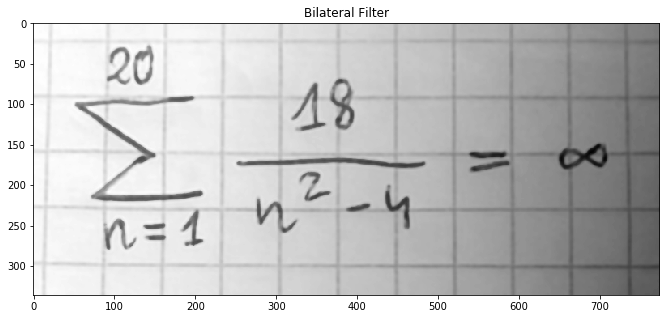

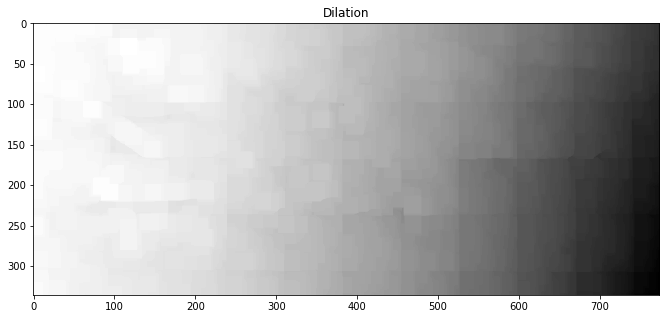

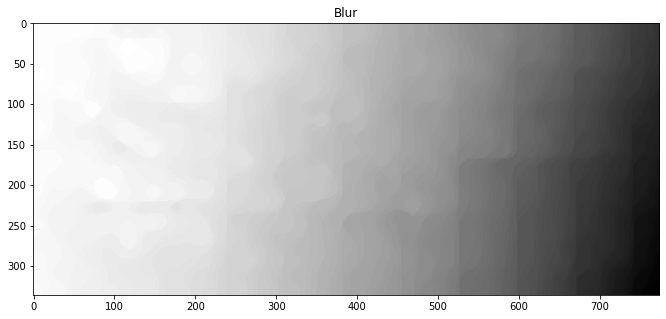

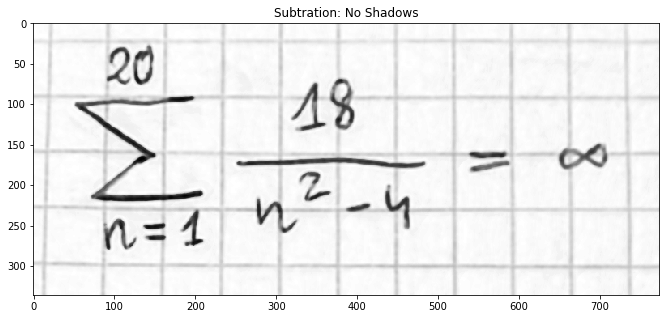

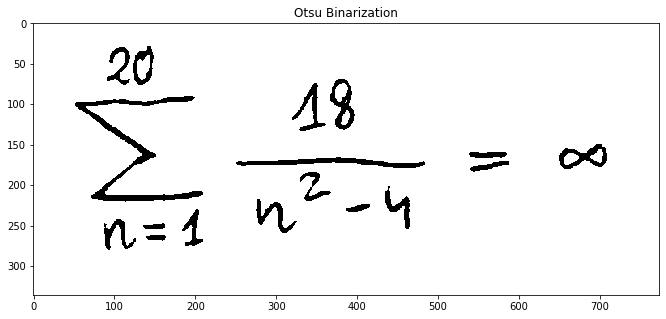

In [100]:
# read in image
img = cv2.imread("sample1.png")

plt.figure(figsize=(20,5))
plt.title("Original")
plt.imshow(img);

# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,5))
plt.title("Grayscale")
plt.imshow(gray_img, cmap="gray");

# filter image ------->>>>> New
gray_img_filt = cv2.bilateralFilter(gray_img, 7, 75, 75)

plt.figure(figsize=(20,5))
plt.title("Bilateral Filter")
plt.imshow(gray_img_filt, cmap="gray");

# dilate the image in order to get ride of the math
dilated_img = cv2.dilate(gray_img_filt, np.ones((20,20), np.uint8))

plt.figure(figsize=(20,5))
plt.title("Dilation")
plt.imshow(dilated_img, cmap="gray");

### Step 2: Blur ### 
# suppress anything else with a blur function

blur_img = cv2.medianBlur(dilated_img, 21)
#blur_img = cv2.GaussianBlur(blur_img,(5,5),0)

plt.figure(figsize=(20,5))
plt.title("Blur")
plt.imshow(blur_img, cmap="gray");


### Step 3: Calculate the difference between the original and background just made ###
# identical bits will be black (close to zero difference), text will be white (large difference)

diff_img = 255 - cv2.absdiff(gray_img_filt, blur_img)

plt.figure(figsize=(20,5))
plt.title("Subtration: No Shadows")
plt.imshow(diff_img, cmap="gray");


# ### Step 4: Apply Simple Threshold ###
# thresh = 210 # anything above 180 is turned to white
# maxValue = 255
# ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)

# plt.figure(figsize=(20,5))
# plt.title("Simple Threshold")
# plt.imshow(thresh2, cmap="gray");

# ### Step 4: Apply Adaptive Threshold ###
# thresh2 = cv2.adaptiveThreshold(diff_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,75,10)
# # ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)

# plt.figure(figsize=(20,5))
# plt.title("Adaptive Threshold")
# plt.imshow(thresh2, cmap="gray");


### Other Option - Step 4: Apply Otsu Binarization ###
thresh = 0
maxValue = 255
ret, thresh3 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(20,5))
plt.title("Otsu Binarization")
plt.imshow(thresh3, cmap="gray");


## Below are the test images. You can see what the algorithm got wrong and right.

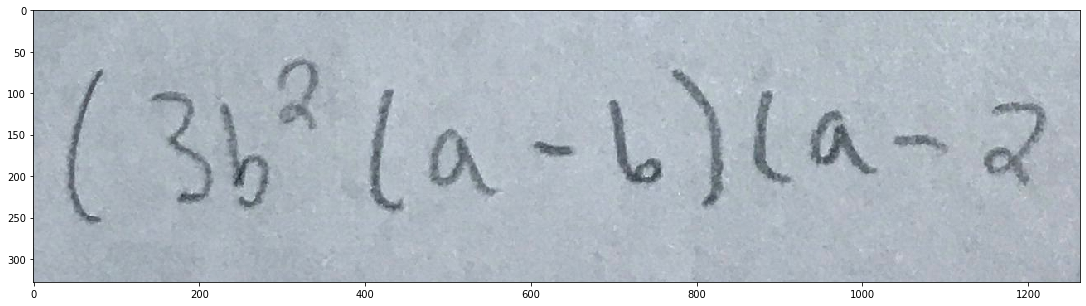

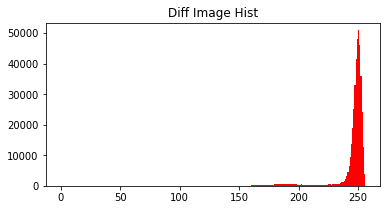

Threshold value calculated to be: 219.0


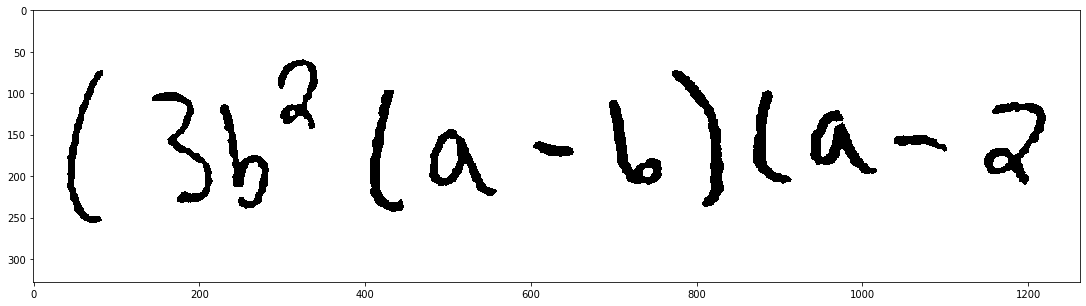

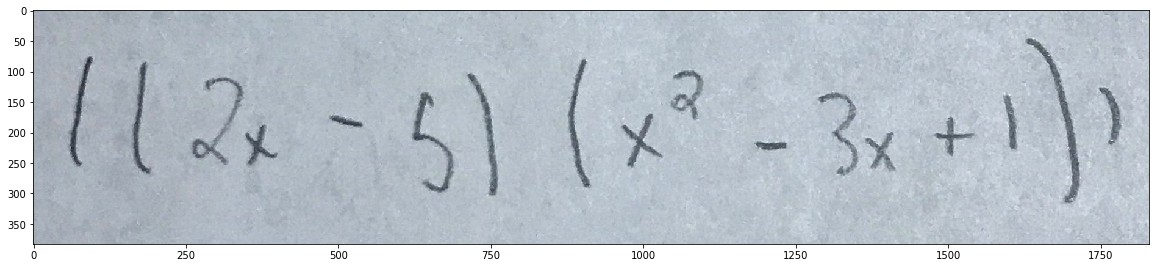

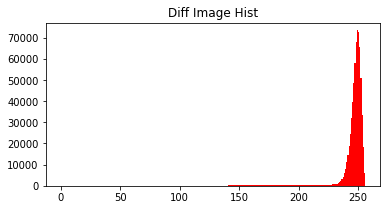

Threshold value calculated to be: 210.0


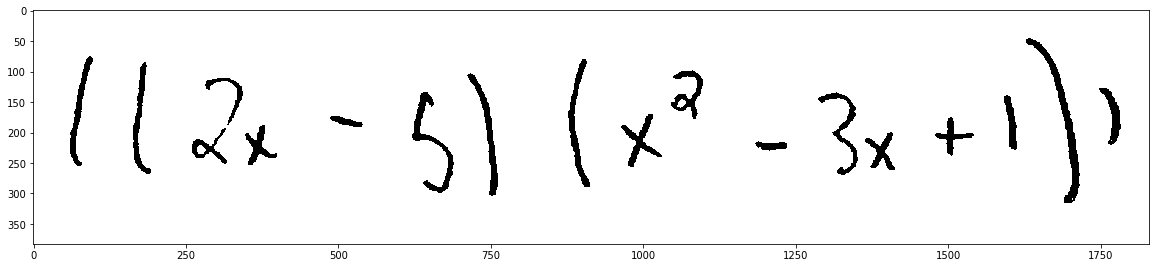

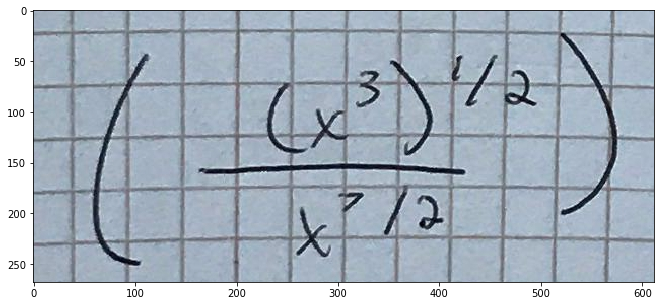

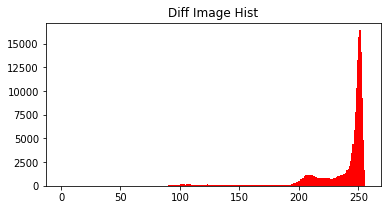

Threshold value calculated to be: 183.0


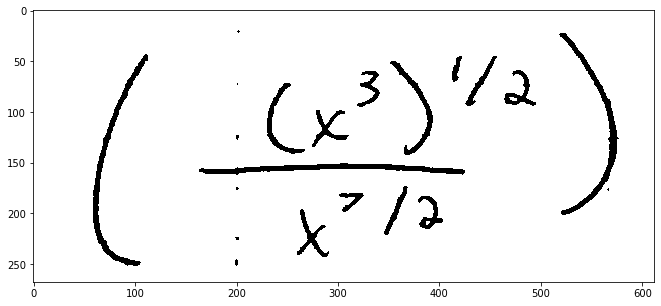

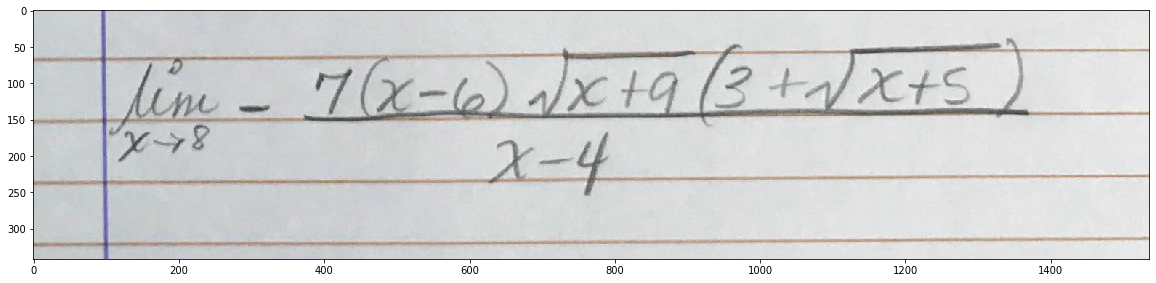

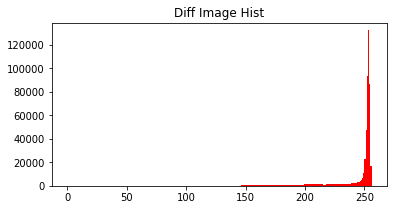

Threshold value calculated to be: 220.0


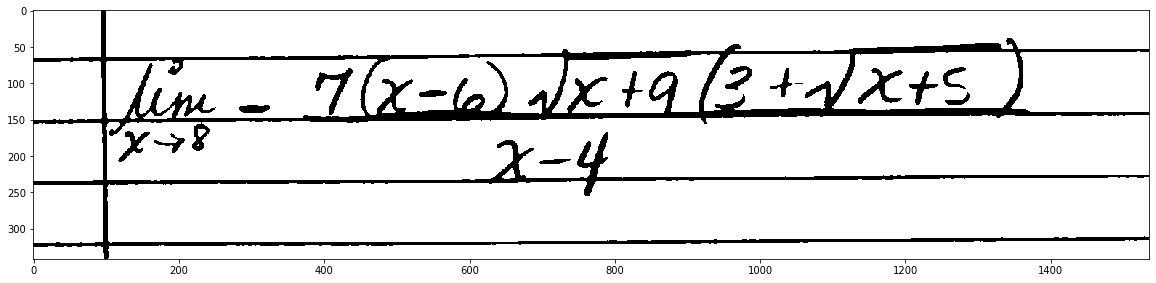

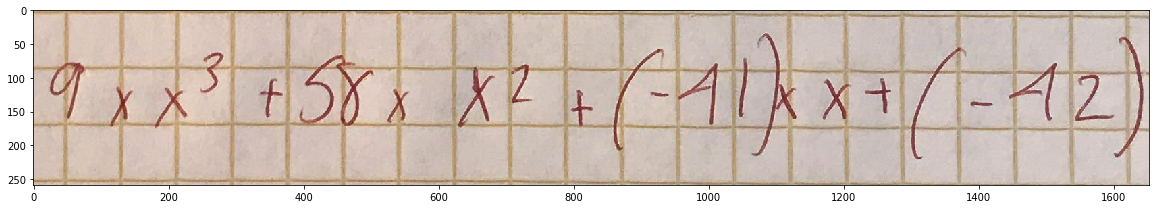

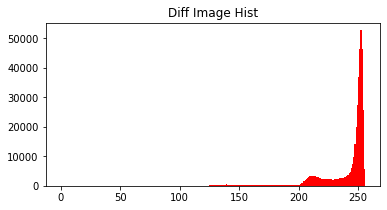

Threshold value calculated to be: 223.0


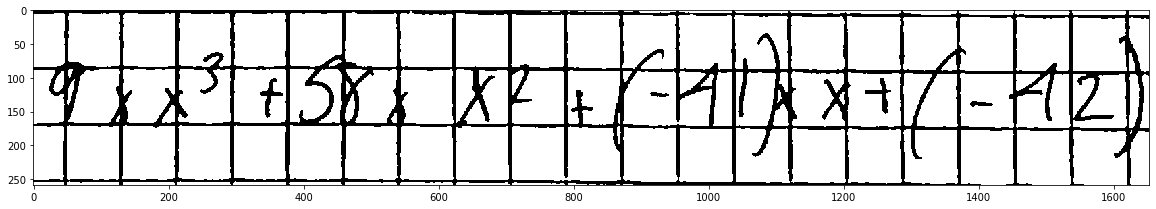

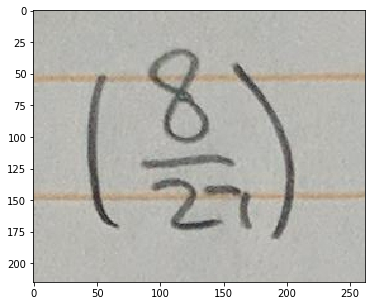

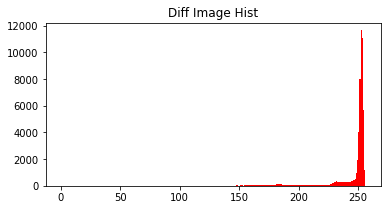

Threshold value calculated to be: 216.0


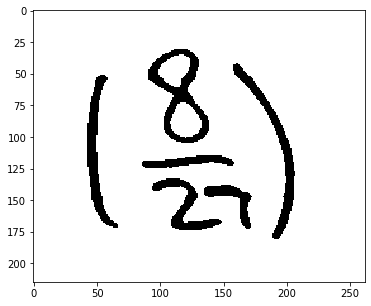

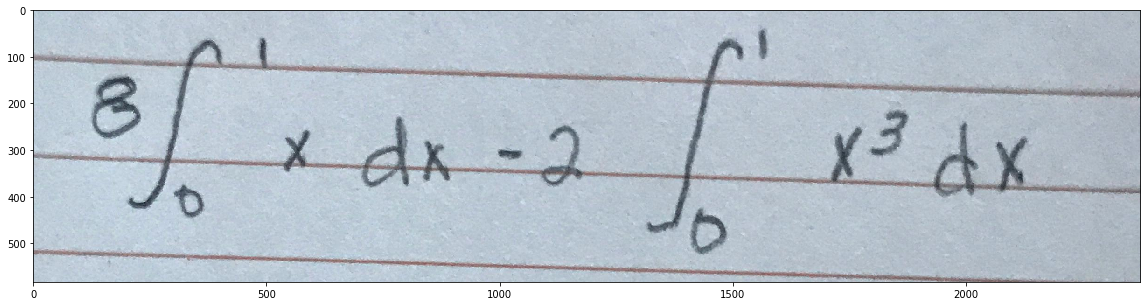

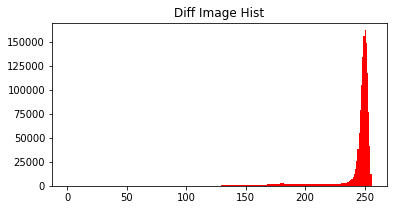

Threshold value calculated to be: 212.0


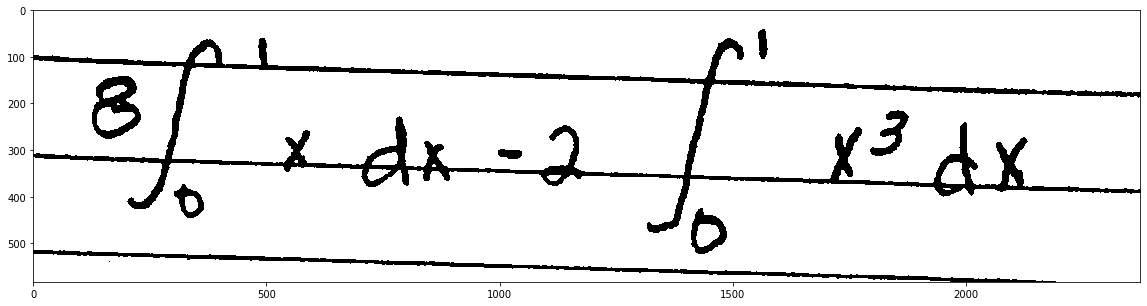

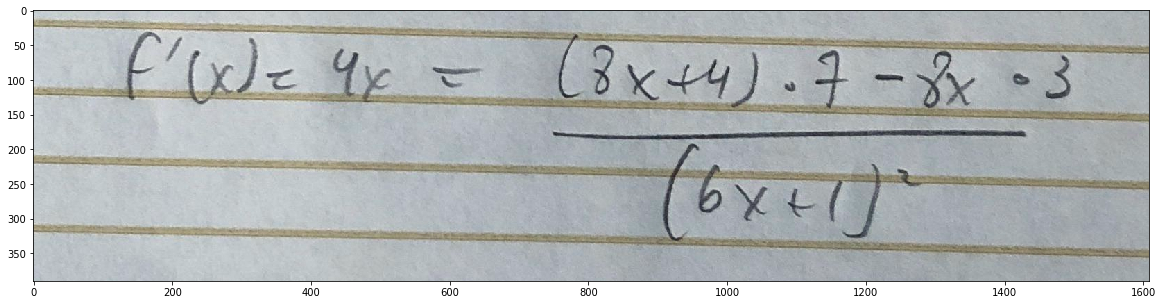

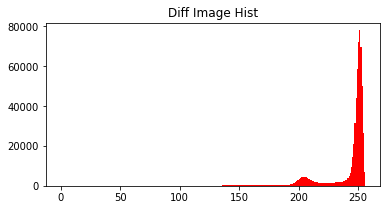

Threshold value calculated to be: 223.0


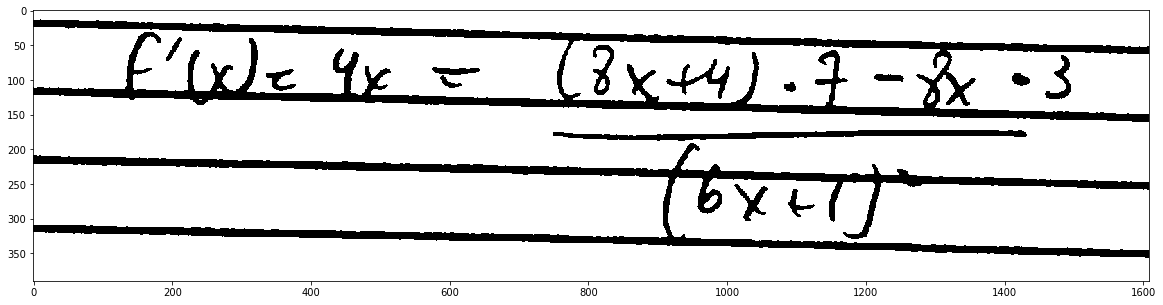

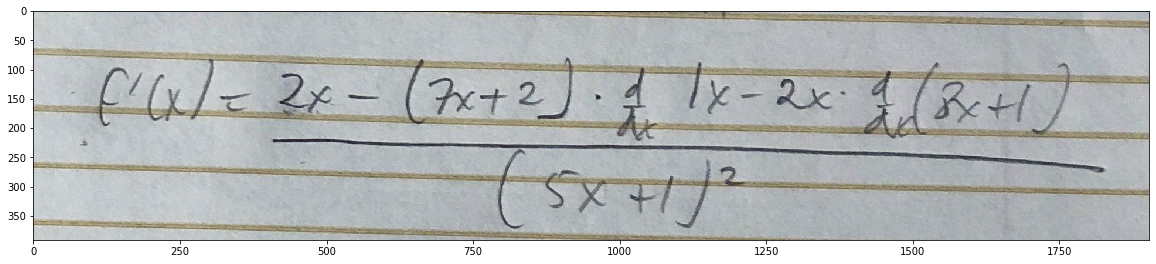

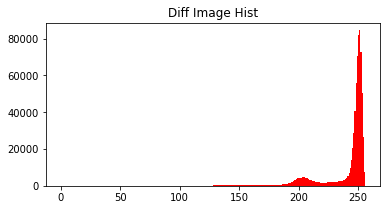

Threshold value calculated to be: 221.0


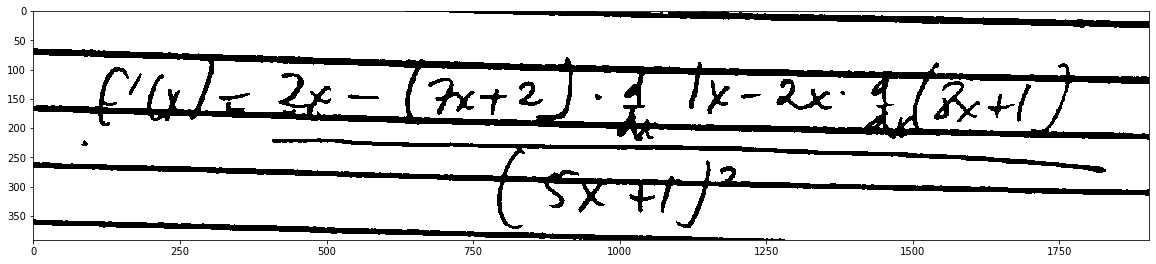

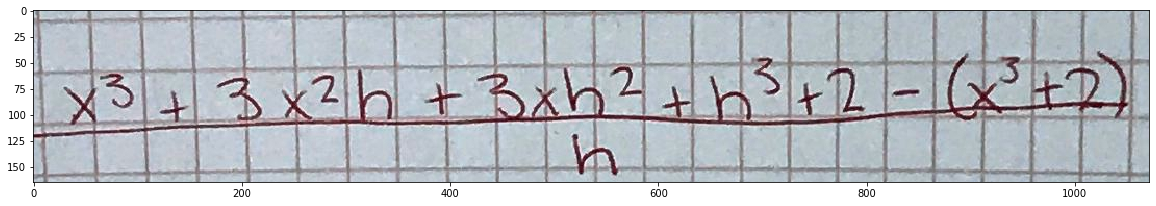

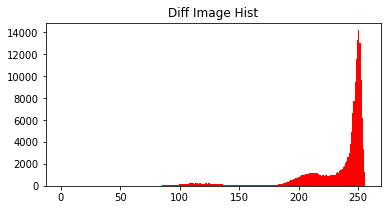

Threshold value calculated to be: 183.0


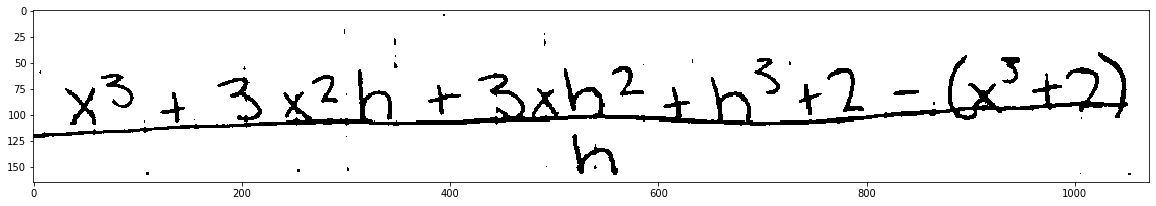

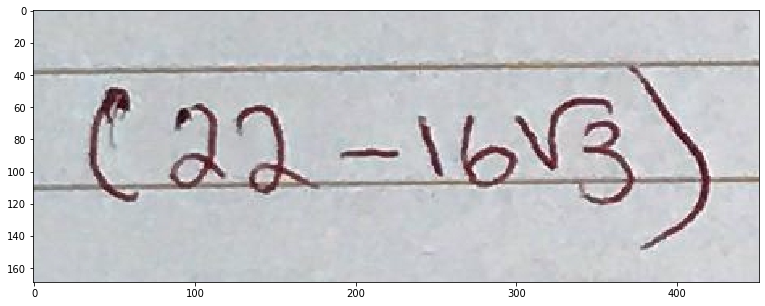

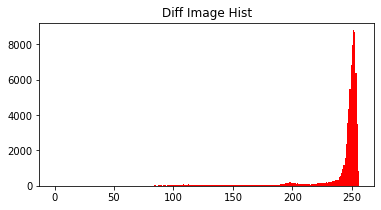

Threshold value calculated to be: 191.0


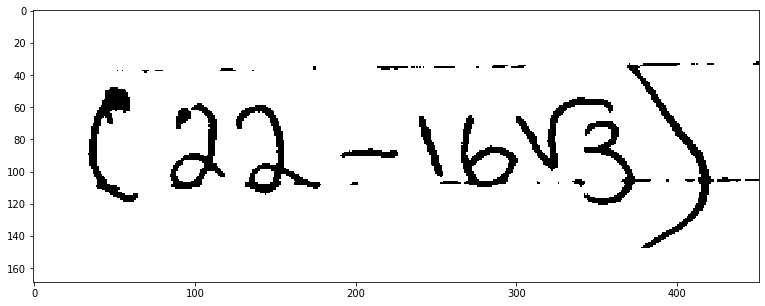

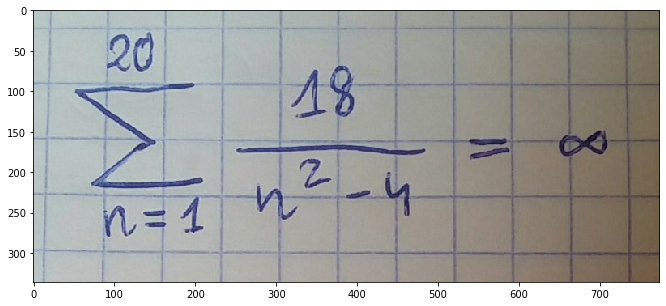

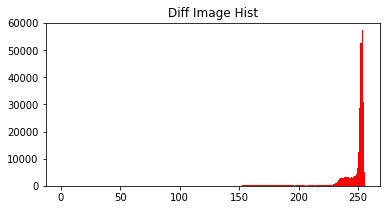

Threshold value calculated to be: 214.0


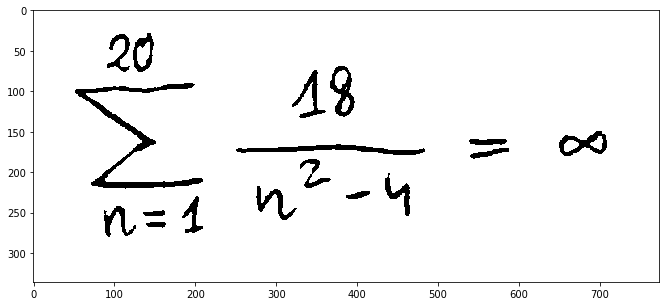

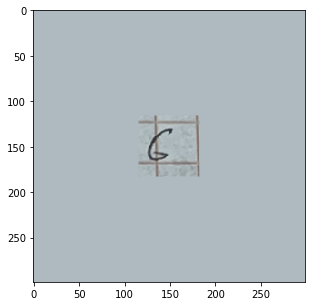

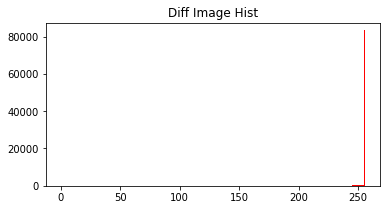

Threshold value calculated to be: 234.0


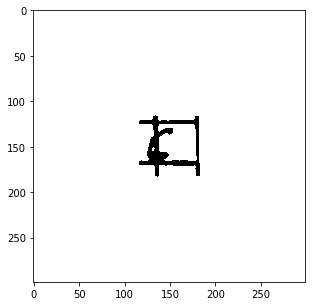

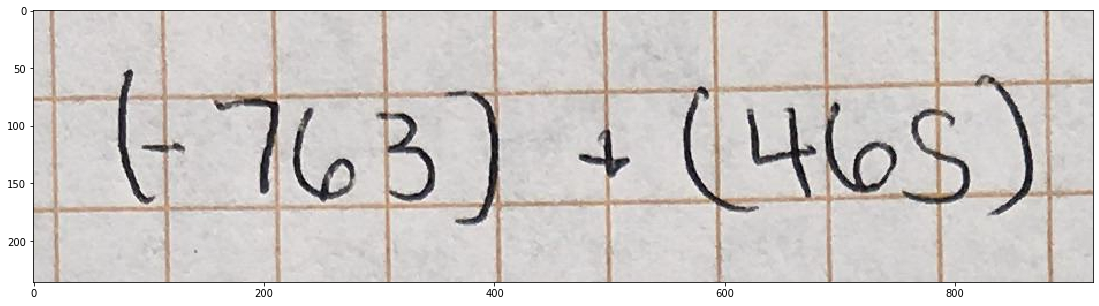

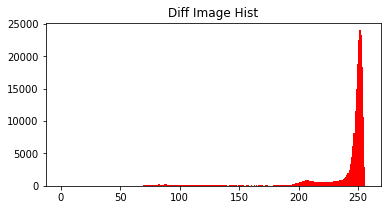

Threshold value calculated to be: 176.0


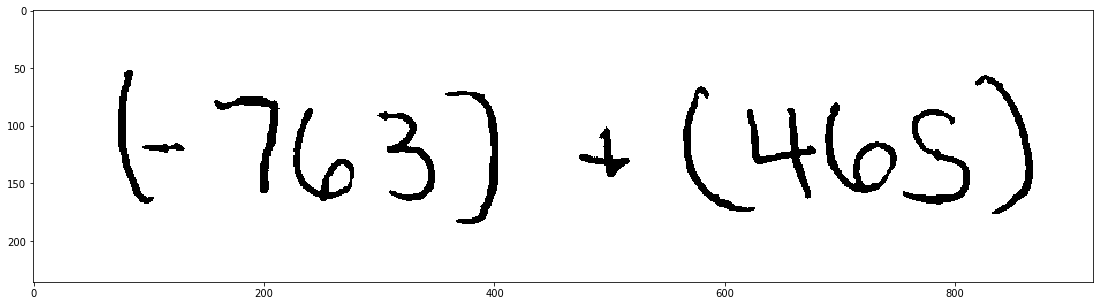

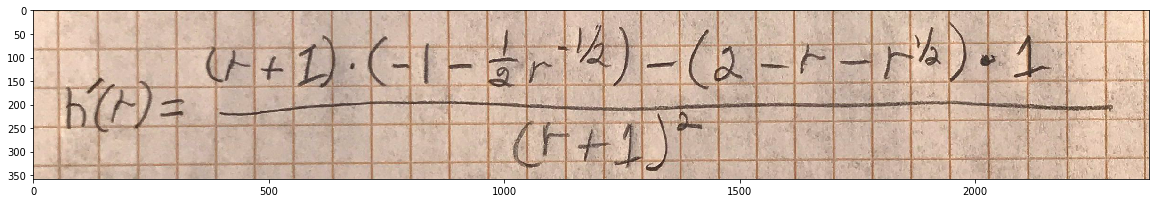

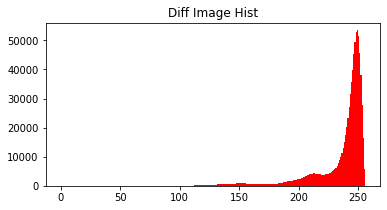

Threshold value calculated to be: 214.0


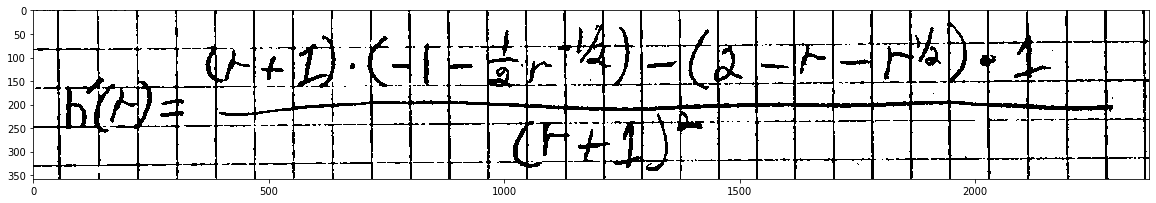

In [102]:
test_dir = 'Test_Images/'

for filename in os.listdir(test_dir):
    
    # read in image
    img = cv2.imread(test_dir + filename)
    #img = cv2.resize(img, (299,299))
    
    plt.figure(figsize=(20,5))
    plt.imshow(img);
    
#     plt.figure(figsize=(6,3))
#     plt.hist(img.ravel(),256,[0,256],color="red")
#     plt.title("Original RGB Image Hist")
#     plt.show()

    # convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

    # filter image ------->>>>> New
    gray_img_filt = cv2.bilateralFilter(gray_img, 7, 75, 75)

    
    # dilate the image in order to get ride of the math
    dilated_img = cv2.dilate(gray_img_filt, np.ones((20,20), np.uint8))

    
    # show dilated image
    # plt.figure(figsize=(20,10))
    # plt.imshow(dilated_img,cmap='gray');

    ### Step 2: Blur ### 
    # suppress anything else with a blur function
    
    blur_img = cv2.medianBlur(dilated_img, 21)
    #blur_img = cv2.GaussianBlur(blur_img,(5,5),0)

    ### Step 3: Calculate the difference between the original and background just made ###
    # identical bits will be black (close to zero difference), text will be white (large difference)

    diff_img = 255 - cv2.absdiff(gray_img_filt, blur_img)
    
    plt.figure(figsize=(6,3))
    plt.hist(diff_img.ravel(),256,[0,256],color="red")
    plt.title("Diff Image Hist")
    plt.show()

    ### Step 4: Apply Simple Threshold ###
#     thresh = 190
#     maxValue = 255
#     ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)

    ### Other Option - Step 4: Apply Otsu Binarization ###
    thresh = 180
    maxValue = 255
    ret, thresh3 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    print("Threshold value calculated to be:", ret)
    
    plt.figure(figsize=(20,5))
    plt.imshow(thresh3,cmap='Greys_r');
